<a href="https://colab.research.google.com/github/Seong-heum/kics2021/blob/main/ex03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX. 03
[Colab.] https://github.com/Seong-heum/kics2021/blob/main/ex03.ipynb

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 54 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# 3-1

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
print(cv.__version__)

4.4.0


In [ ]:
!wget https://www.dropbox.com/s/9bkst33ad79ckvv/baboon.jpg?dl=0 -O baboon.jpg

--2021-07-28 01:11:34--  https://www.dropbox.com/s/9bkst33ad79ckvv/baboon.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9bkst33ad79ckvv/baboon.jpg [following]
--2021-07-28 01:11:34--  https://www.dropbox.com/s/raw/9bkst33ad79ckvv/baboon.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd9c2f9477b020a925ddd488bdd.dl.dropboxusercontent.com/cd/0/inline/BTFjzN5rypn306fuz0H8I1MWA04ZaEXehJIcIv1rTkZvWySZdg_9WMLdzPClLM00wMoR7zdIMhJzNqcK5iqLYBou_1FrAQkbOqR9kLJ9GM7PP7McZ9gQjaFmECqZT3RG0-GN-sGWLsxu7OgXec4BJJk1/file# [following]
--2021-07-28 01:11:35--  https://ucd9c2f9477b020a925ddd488bdd.dl.dropboxusercontent.com/cd/0/inline/BTFjzN5rypn306fuz0H8I1MWA04ZaEXehJIcIv1rTkZvWySZdg_9WMLdzPClLM00wMoR7zdIMhJzNqcK5iqLYBou_1F

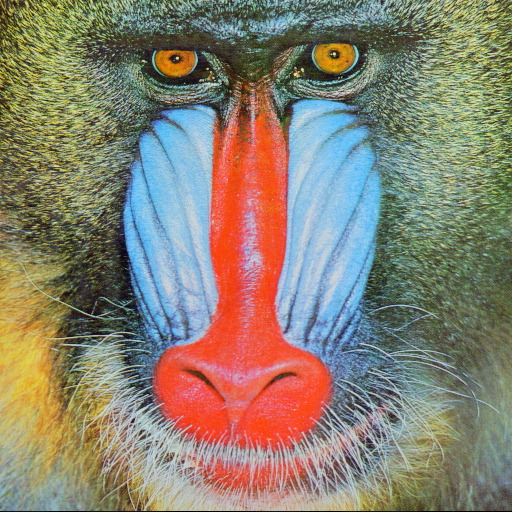

In [ ]:
img = cv.imread("baboon.jpg")
cv2_imshow(img)

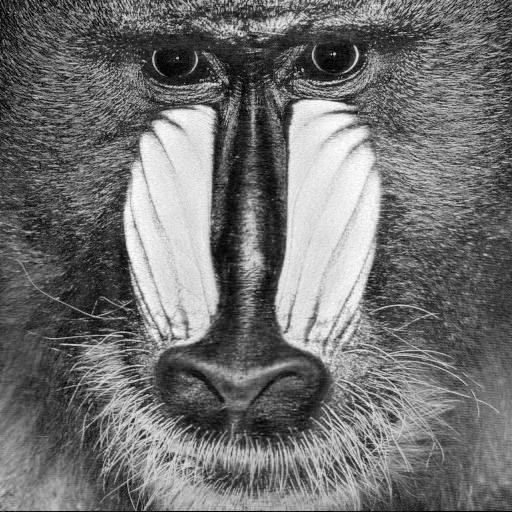

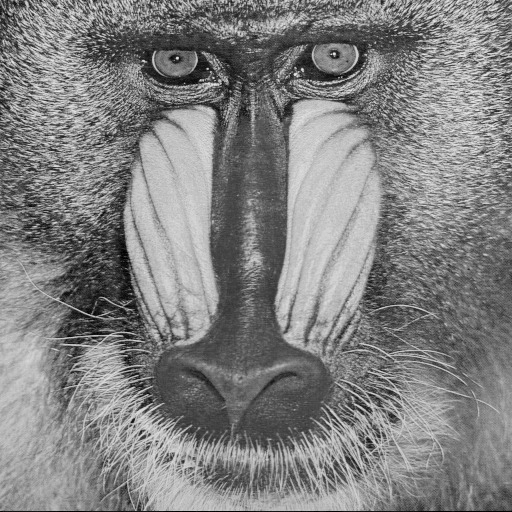

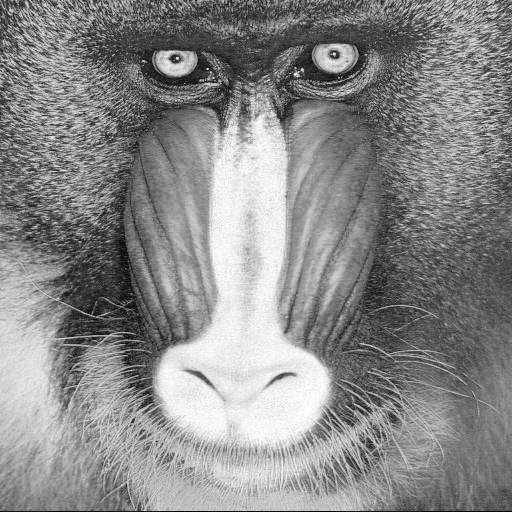

In [ ]:
(B, G, R) = cv.split(img)
cv2_imshow(B)
cv2_imshow(G)
cv2_imshow(R)

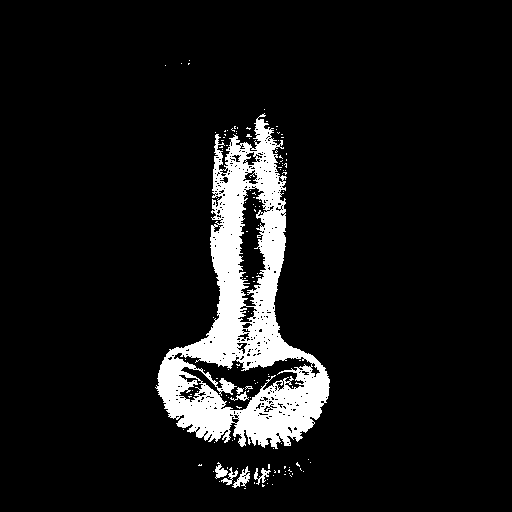

In [ ]:
ext = cv.inRange(img, (0, 0, 200), (100, 100, 255)) # segmentation
cv2_imshow(ext)

In [ ]:
# histogram (functions)
def hist_lines(inp):
    bins = np.zeros((256*3,2), np.int32 )
    bins[:,0:1] = np.arange(256*3).reshape(256*3, 1)
    color = [ (255,0,0),(0,255,0),(0,0,255) ]
    out = np.zeros((300,256*3,3))
    for ch, col in enumerate(color):
        hist_item = cv.calcHist([inp],[ch],None,[256],[0,256])
        cv.normalize(hist_item,hist_item,0,255,cv.NORM_MINMAX)
        hist=np.int32(np.around(hist_item))
        bins[256*ch:256*(ch+1),1:2] = hist
        for x, y in zip(bins[256*ch:256*(ch+1),0:1], hist):
            x, y = int(x), int(y)
            cv.line(out,(x,0),(x,y),col)
    out = np.flipud(out)
    return out

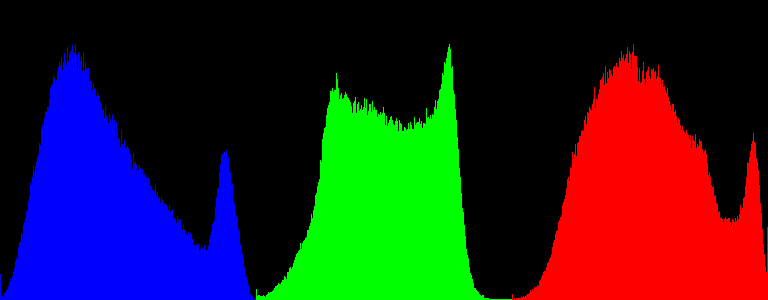

In [ ]:
# histogram (visualization)
lines = hist_lines(img)
cv2_imshow(lines)

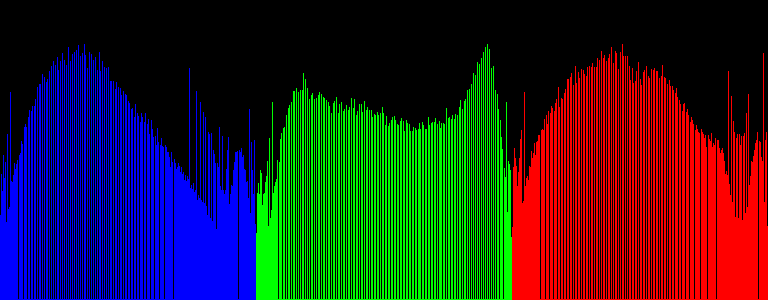

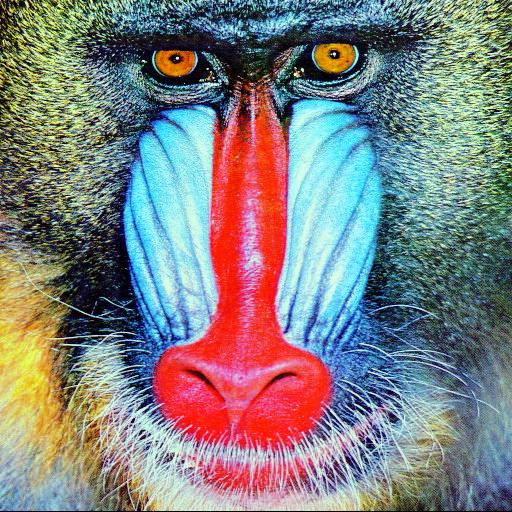

In [ ]:
# equalization
R_eq = cv.equalizeHist( R )
G_eq = cv.equalizeHist( G )
B_eq = cv.equalizeHist( B )
img_eq = cv.merge([B_eq, G_eq, R_eq])
lines_eq = hist_lines(img_eq)
cv2_imshow(lines_eq)
cv2_imshow(img_eq)

# 3-2

--2021-07-28 01:14:52--  https://www.dropbox.com/s/6dr3a0yel19ecfl/left01.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6dr3a0yel19ecfl/left01.jpg [following]
--2021-07-28 01:14:52--  https://www.dropbox.com/s/raw/6dr3a0yel19ecfl/left01.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc92a6e0eae209082d9357ea814f.dl.dropboxusercontent.com/cd/0/inline/BTEzs0Ussj8FIBz8uioenlgDLqa63SgDcjNzzm5umQtrGrCgPH0day3jMtAQllR-H9DcAyAScDBL0xx8CpCGlLJUiFEYwSNoPn-Wfs3_7A58-GzwNtweDAfscsjSeLEYynnN_pi3PVHB51D1MUl7lAKp/file# [following]
--2021-07-28 01:14:53--  https://uc92a6e0eae209082d9357ea814f.dl.dropboxusercontent.com/cd/0/inline/BTEzs0Ussj8FIBz8uioenlgDLqa63SgDcjNzzm5umQtrGrCgPH0day3jMtAQllR-H9DcAyAScDBL0xx8CpCGlLJUiFE

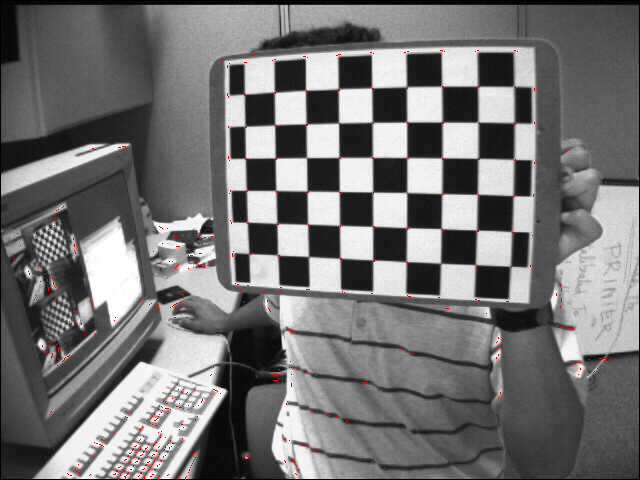

In [ ]:
# Harris corner
!wget https://www.dropbox.com/s/6dr3a0yel19ecfl/left01.jpg?dl=0 -O img.jpg
img = cv.imread("img.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray, 2, 25, 0.15)
img[dst > 0.01 * dst.max()] = [0, 0, 255]
cv2_imshow(img)


# 3-3

In [ ]:
!wget https://www.dropbox.com/s/27rvsjfjhnwp6jd/box.png?dl=0 -O box.png
!wget https://www.dropbox.com/s/muxbttnq26815qy/box_in_scene.png?dl=0 -O box_in_scene.png

--2021-07-28 01:14:53--  https://www.dropbox.com/s/27rvsjfjhnwp6jd/box.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/27rvsjfjhnwp6jd/box.png [following]
--2021-07-28 01:14:53--  https://www.dropbox.com/s/raw/27rvsjfjhnwp6jd/box.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc050e9f8a0fb6ea380a9d967e71.dl.dropboxusercontent.com/cd/0/inline/BTEid48tHC3dcTNxGwzwg44dFtcNaNOlUD4ExQ7yhapkIOxslSH8Vqld4AQ4E-ygGmHwTThfNsaTjkdGNBFQH09dQ-BiJqguee_tekvtrkAXS3lsjcNYAIXXVKnT52qXoTcBRU9tUxFmvGS_6Nx36HgU/file# [following]
--2021-07-28 01:14:53--  https://uc050e9f8a0fb6ea380a9d967e71.dl.dropboxusercontent.com/cd/0/inline/BTEid48tHC3dcTNxGwzwg44dFtcNaNOlUD4ExQ7yhapkIOxslSH8Vqld4AQ4E-ygGmHwTThfNsaTjkdGNBFQH09dQ-BiJqguee_t

In [ ]:
# Load the images.
img0 = cv.imread("box.png", cv.IMREAD_GRAYSCALE)
img1 = cv.imread("box_in_scene.png", 0)

In [ ]:
# Perform SIFT/ORB feature detection and description.
sift = cv.SIFT_create()
kp0, des0 = sift.detectAndCompute(img0, None)
kp1, des1 = sift.detectAndCompute(img1, None)
#orb = cv.ORB_create()
#kp0, des0 = orb.detectAndCompute(img0, None)
#kp1, des1 = orb.detectAndCompute(img1, None)

In [ ]:
# Perform brute-force KNN matching.
bf = cv.BFMatcher(cv.DescriptorMatcher_BRUTEFORCE, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)

In [ ]:
# Sort the pairs of matches by distance.
# Draw the 20 best pairs of matches.
pairs_of_matches = sorted(pairs_of_matches, key=lambda x:x[0].distance)
img_pairs_of_matches = cv.drawMatchesKnn( img0, kp0, img1, kp1, pairs_of_matches[:20], img1, flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

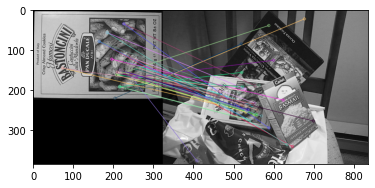

In [ ]:
# Show the pairs of matches.
plt.imshow(img_pairs_of_matches)
plt.show()

In [ ]:
# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]

In [ ]:
# Draw the best 20 matches.
img_matches = cv.drawMatches( img0, kp0, img1, kp1, matches[:20], img1, flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

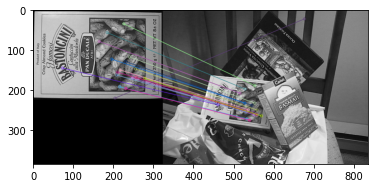

In [ ]:
# Show the matches.
plt.imshow(img_matches)
plt.show()

# 3-4

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
!wget https://www.dropbox.com/s/oj0mfo6e654c9s2/tsukuba_l.png?dl=0 -O tsukuba_l.png
!wget https://www.dropbox.com/s/0pe324puqcd6o7e/tsukuba_r.png?dl=0 -O tsukuba_r.png

--2021-07-28 01:14:55--  https://www.dropbox.com/s/oj0mfo6e654c9s2/tsukuba_l.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/oj0mfo6e654c9s2/tsukuba_l.png [following]
--2021-07-28 01:14:55--  https://www.dropbox.com/s/raw/oj0mfo6e654c9s2/tsukuba_l.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce0418a449107219ef7b308cdf7.dl.dropboxusercontent.com/cd/0/inline/BTHXiZgU_uLQi0vbBCsEUb3kzALkQ42lvDTfctSEcD0kk5mR1-X4NC-krFhruCMN10Ln12HF1lHrQb7D7t2PfrQPBdMht1GJiZYcVmoME0oBytL_-ASWjpVebPk9zlZOUe_UYjvaMGul2ew6Fs2rRJld/file# [following]
--2021-07-28 01:14:55--  https://uce0418a449107219ef7b308cdf7.dl.dropboxusercontent.com/cd/0/inline/BTHXiZgU_uLQi0vbBCsEUb3kzALkQ42lvDTfctSEcD0kk5mR1-X4NC-krFhruCMN10Ln12HF1lHrQb7D7t

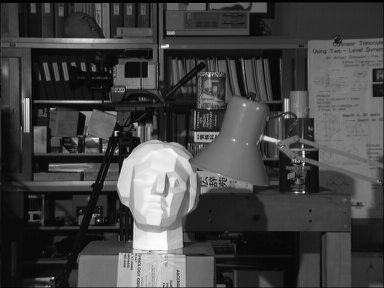

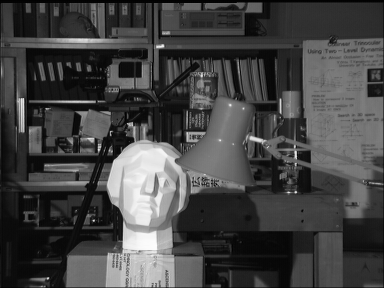

In [ ]:
imgL = cv.imread('tsukuba_l.png',0)
imgR = cv.imread('tsukuba_r.png',0)
cv2_imshow(imgL)
cv2_imshow(imgR)

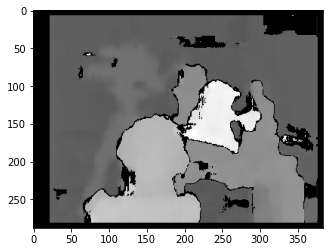

In [ ]:
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()